In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import trompy as tp
import csv
from datetime import datetime, timedelta


# the next two lines will expand the printed tables
pd.options.display.max_rows= 40000
pd.options.display.max_columns= 40000


ctl_color= "gray"
exp_color="deepskyblue"
fig_folder=r"../plots\\"
READ_METAFILE= pd.read_excel(r"/workspaces/FEDPROFERENCE/FEDXD_METAFILE.xls" ,sheet_name="METAFILE" )

#READ_METAFILE


In [2]:
data= pd.read_csv("/workspaces/FEDPROFERENCE/results/MEGA_MEAL.csv")
data

,MOUSEID,SEX,DIET,CHOICE_SESSION,PELLET_TYPE,COUNT,MEAL_SIZE,SNACK_SIZE,NUMBER_OF_MEALS,MEAL_FREQUENCY,NUMBER_OF_SNACKS,SNACK_FREQUENCY,NUMBER_OF_MEGA_MEALS,AVERAGE_MEGA_MEAL_SIZE,MEALS_HOUR_0,MEALS_HOUR_1,MEALS_HOUR_2,MEALS_HOUR_3,MEALS_HOUR_4,MEALS_HOUR_5,MEALS_HOUR_6,MEALS_HOUR_7,MEALS_HOUR_8,MEALS_HOUR_9,MEALS_HOUR_10,MEALS_HOUR_11,MEALS_HOUR_12,MEALS_HOUR_13,MEALS_HOUR_14,MEALS_HOUR_15,MEALS_HOUR_16,MEALS_HOUR_17,MEALS_HOUR_18,MEALS_HOUR_19,MEALS_HOUR_20,MEALS_HOUR_21,MEALS_HOUR_22,MEALS_HOUR_23
0,FEDXDF1,F,PR,0.0,MIX,210,4.666667,1.0,42,1.932688,14,0.644229,10,7.400000,2.0,1.0,0.0,3.0,3.0,1.0,1.0,4.0,0.0,0.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0
1,FEDXDF1,F,PR,0.0,MIX,296,3.271429,1.0,70,1.471112,67,1.408064,5,7.600000,7.0,3.0,5.0,0.0,0.0,3.0,2.0,0.0,2.0,1.0,1.0,2.0,4.0,1.0,5.0,4.0,8.0,5.0,5.0,4.0,0.0,0.0,6.0,2.0
2,FEDXDF2,F,PR,0.0,MIX,350,3.387097,1.0,93,4.203179,35,1.581841,10,6.900000,2.0,1.0,8.0,11.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,5.0,4.0,5.0,7.0,7.0,6.0,6.0,6.0,6.0,4.0,5.0,2.0
3,FEDXDF2,F,PR,0.0,MIX,330,3.011905,1.0,84,1.727763,77,1.583783,5,6.600000,6.0,2.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,5.0,4.0,8.0,8.0,7.0,9.0,7.0,4.0,4.0,3.0,4.0,3.0
4,FEDXDF3,F,PR,0.0,MIX,291,3.652174,1.0,69,2.923626,39,1.652484,8,7.625000,4.0,5.0,0.0,4.0,4.0,0.0,5.0,0.0,2.0,3.0,0.0,1.0,2.0,4.0,6.0,5.0,5.0,7.0,4.0,4.0,3.0,1.0,0.0,0.0
5,FEDXDF3,F,PR,0.0,MIX,375,4.144737,1.0,76,1.565764,60,1.236129,18,8.000000,5.0,0.0,5.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,1.0,6.0,5.0,6.0,6.0,7.0,6.0,4.0,4.0,4.0,3.0,1.0,4.0
6,FEDXDF4,F,PR,0.0,MIX,294,4.257576,1.0,66,2.779630,13,0.547503,16,7.250000,4.0,3.0,7.0,6.0,0.0,1.0,2.0,0.0,4.0,1.0,2.0,1.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,2.0,2.0,0.0,3.0,3.0
7,FEDXDF4,F,PR,0.0,MIX,312,4.928571,1.0,56,1.150724,36,0.739751,22,7.181818,3.0,0.0,4.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,4.0,4.0,4.0,7.0,3.0,4.0,4.0,4.0,4.0,1.0,0.0,4.0
8,FEDXDF5,F,PR,0.0,MIX,227,5.538462,1.0,39,2.372744,11,0.669235,19,8.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
9,FEDXDF5,F,PR,0.0,MIX,363,4.920635,1.0,63,1.362612,53,1.146325,24,8.416667,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,5.0,6.0,6.0,4.0,6.0,6.0,3.0,4.0,4.0,3.0,0.0,3.0


/home/codespace/.python/current/lib/python3.10/site-packages/trompy/barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


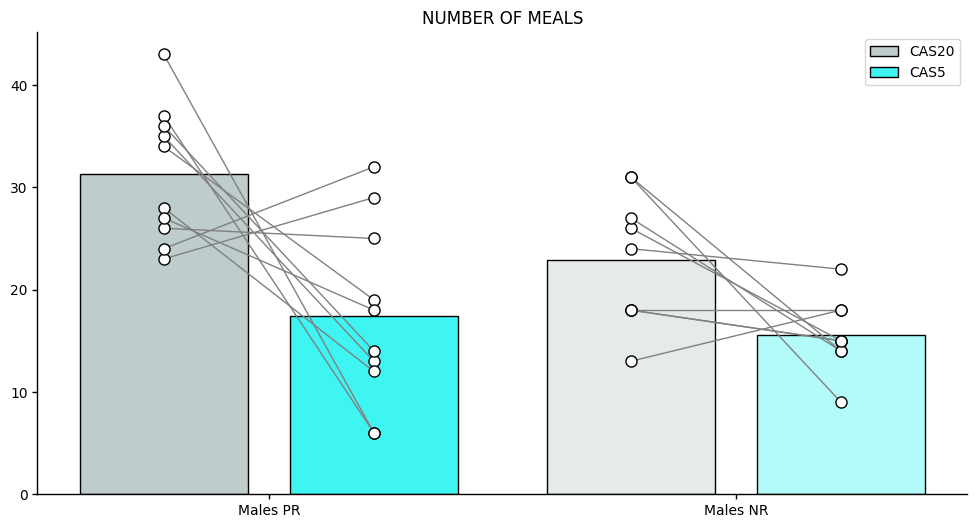

In [3]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['CAS5']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['CAS5']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['CAS5']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['CAS5']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("NUMBER OF MEALS")
ax.legend(barlist, ['CAS20', 'CAS5'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR']
ax.set_xticks([1,2])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()



/home/codespace/.python/current/lib/python3.10/site-packages/trompy/barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


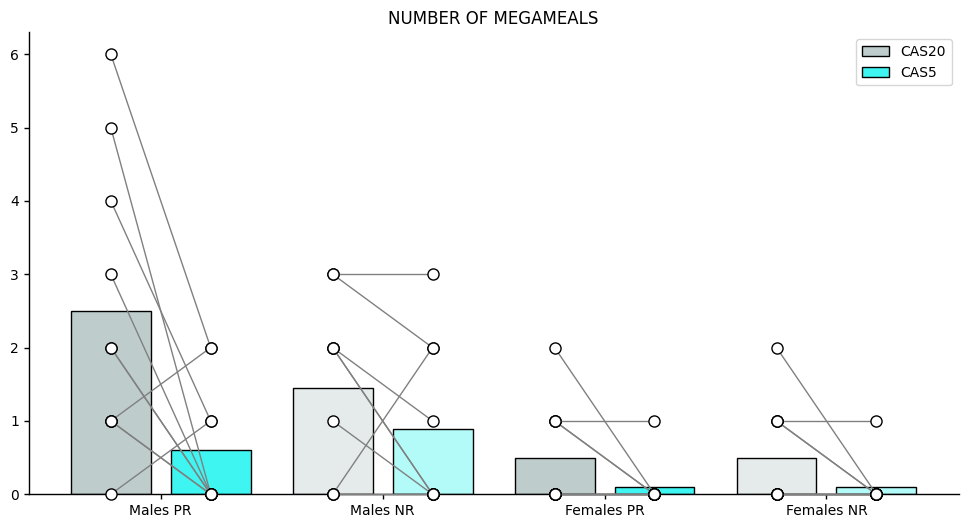

In [13]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['CAS5']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['CAS5']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['CAS5']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['CAS5']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("NUMBER OF MEGAMEALS")
ax.legend(barlist, ['CAS20', 'CAS5'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()



/home/codespace/.python/current/lib/python3.10/site-packages/trompy/barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


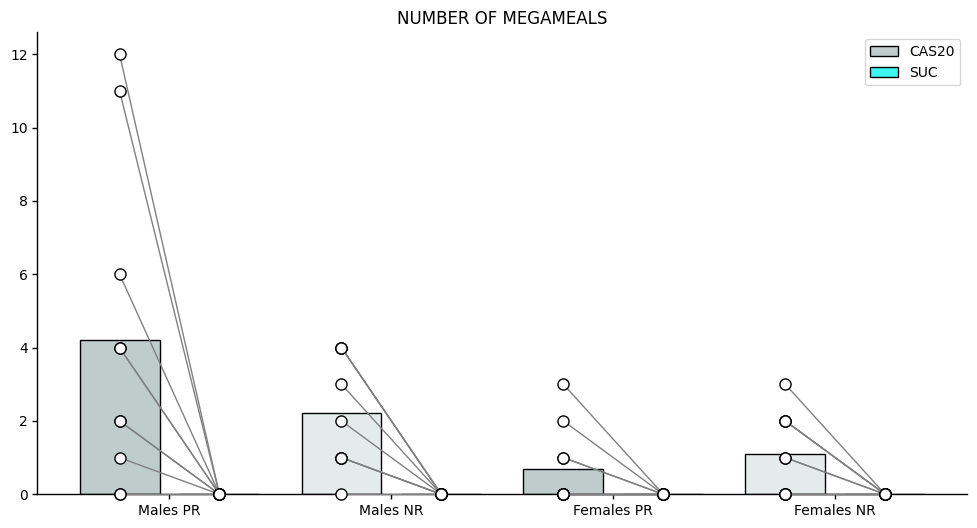

In [12]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['SUC']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['SUC']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['SUC']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['SUC']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("NUMBER OF MEGAMEALS")
ax.legend(barlist, ['CAS20', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()



/home/codespace/.python/current/lib/python3.10/site-packages/trompy/barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


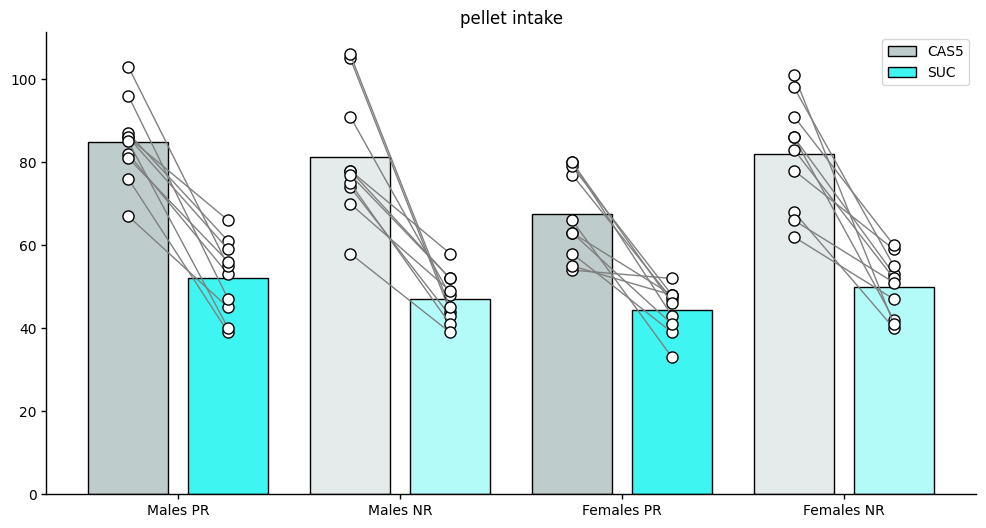

In [14]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS5']
cas5_mpr1= average_pellets_per_type_mpr1['SUC']
cas20_fpr1= average_pellets_per_type_fpr1['CAS5']
cas5_fpr1= average_pellets_per_type_fpr1['SUC']

cas20_mnr1= average_pellets_per_type_mnr1['CAS5']
cas5_mnr1= average_pellets_per_type_mnr1['SUC']
cas20_fnr1= average_pellets_per_type_fnr1['CAS5']
cas5_fnr1= average_pellets_per_type_fnr1['SUC']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("pellet intake")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()



In [ ]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['CAS5']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['CAS5']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['CAS5']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['CAS5']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("NUMBER OF MEGAMEALS")
ax.legend(barlist, ['CAS20', 'CAS5'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

